In [121]:
import cv2 as cv 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import math
import numpy as np

### If you want to receive the photos one by one

In [122]:
#data real
imagefiles = glob.glob("Dataset/Data_car/*.png")
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    data.append(img)

num_images = len(data)


lst = []
for i in imagefiles:
    lst.append(int(i[22:-4]))

y = np.array(lst)

print(num_images)
print(y)



200
[ 1  6 13  9  7  1  8  5  7  9 18  3  3  5  2  0  9  6  1 13  1  8  8  6
  5  7 15  2  5 26  7  3  9  8 21  6  9  5  8  2  9  8 21  6  9  5  8  2
 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26  7  9 21  1  5  7  5  6
  7  7 26 26 26 26 26 26 26 26 26 26 26 26 26 26  7  9 10  6  6  9  2  5
 26 26 11 26 26 26 26 26 26 26 26 26 26 26 26 26  8  5 17 26 26  5  9  2
 26 26 26 26 26 26  9  2 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26 26
  2  2 16  6 26  2  4  6  1  5 10  6  9  7  7  2  8  5 19  6  6  6  2  1
  1  7 10  6  4  1  0  1  1  7 20  1  7  9  8  8  2  2 21  1  1  1  1  1
  4  7 16  5  9  8  9  9]


### You can also use the following code to get data

### Receive labels

In [106]:
label_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   11200 non-null  int32
dtypes: int32(1)
memory usage: 43.9 KB


## Show some sample data

### train_test_split

In [239]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,y, test_size=0.2, random_state=42)

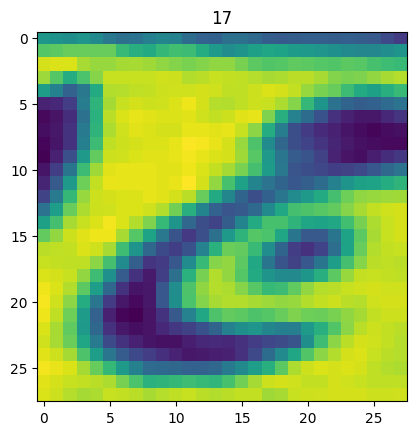

In [240]:
plt.imshow(xtrain[10])
plt.title(np.array(ytrain)[10]);

In [191]:
np.array(xtrain).shape

(160, 28, 28)

In [151]:
xtrain = 

In [220]:
for i in range(len(xtrain)):
    xtrain[i] = np.array([xtrain[i]])

In [222]:
xtrain[0].shape

(1, 28, 28)

In [244]:
xtrain = np.array(xtrain)

## Model

In [245]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(350, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(27, activation = 'softmax'))

In [246]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [247]:
history = model.fit(xtrain, ytrain, epochs=20, validation_split = 0.10)

Epoch 1/20
5/5 [==============================] - 1s 65ms/step - loss: 212.6921 - accuracy: 0.1181 - val_loss: 59.1978 - val_accuracy: 0.2500
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 136.8559 - accuracy: 0.1944 - val_loss: 49.3438 - val_accuracy: 0.3125
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 111.9658 - accuracy: 0.2708 - val_loss: 44.4690 - val_accuracy: 0.1875
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 86.2118 - accuracy: 0.3194 - val_loss: 38.8837 - val_accuracy: 0.1250
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 70.2393 - accuracy: 0.2361 - val_loss: 21.2354 - val_accuracy: 0.4375
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 55.8792 - accuracy: 0.3611 - val_loss: 26.4270 - val_accuracy: 0.3750
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 44.2291 - accuracy: 0.3264 - val_loss: 19.1432 - val_accuracy: 0.4375
Epoch 8/20

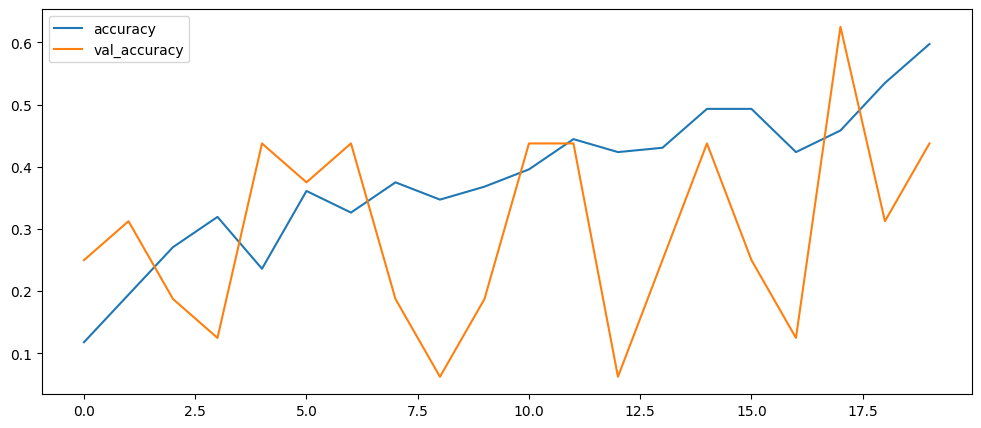

In [248]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()

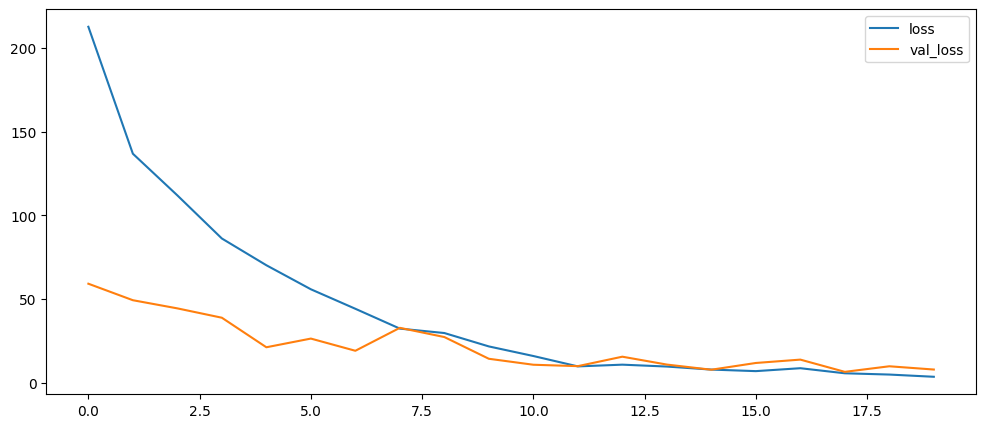

In [249]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend()

In [271]:
path = "C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Dataset/Result-Yolov7/pieces/437.png"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = np.array(img).reshape(-1,28,28)
#input_image = np.expand_dims(img, axis=0)
y_pred = model.predict(img)
y_pred.argmax()

1/1 [==============================] - 0s 28ms/step


2

### Predict

In [17]:
loss_accuracy = model.evaluate(xtest, ytest, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 0.20287826657295227
accuracy: 0.9892857074737549


In [18]:
y_pred = model.predict(xtest)

y_predd = []
for i in range(len(y_pred)):
    y_predd.append(y_pred[i].argmax())

y_pred = np.array(y_predd)

70/70 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       213
           3       1.00      1.00      1.00       218
           4       1.00      1.00      1.00       205
           5       1.00      0.89      0.94       219
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       216
           8       0.90      1.00      0.95       213
           9       1.00      1.00      1.00       241
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        20
          17       1.00    

<Axes: >

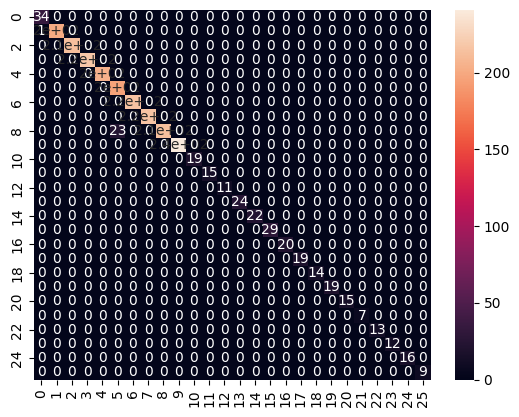

In [19]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True)

In [20]:
model.save('model_beta.h5')

C:\Users\Shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
